## <div align="center"> PROBLEM IDENTIFICATION: SENTIMENT ANALYSIS
### Attempt to predict a consumer's numerical rating of a drug (dependent variable) based on the other parameters defined within the dataset (independent variables)
#### *side note: I will be conducting some in-depth EDA that is unrelated to the NLP problem at hand; I would just like to explore the comparisons between similar drugs as well as their subjective efficacy (individual and aggregated responses from consumers)
   
<a href="Intended hyperlink">![Pills](https://assets.technologynetworks.com/production/dynamic/images/content/353503/nine-existing-drugs-reduce-sars-cov-2-viral-load-in-cell-based-study-353503-1280x720.webp?cb=11408532)</a>

In [1]:
# importing the initial libraries/packages required for reading in the data and performing based transformations
# some things to look into -
# 1. Classification: Can you predict the patient's condition based on the review?
# 2. Regression: Can you predict the rating of the drug based on the review?
# 3. Sentiment analysis: What elements of a review make it more helpful to others? 
#    Which patients tend to have more negative reviews? 
#    Can you determine if a review is positive, neutral, or negative?

%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import mitosheet # more interactive way to view the dataframe 

# showing the folder structure/path to raw data
import os
for dirname, _, filenames in os.walk('/Users/alexanderblaies/Desktop/ML Projects and Exercises/Major Projects/Drug Reviews/data/raw_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/alexanderblaies/opt/anaconda3/lib/python3.8/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


/Users/alexanderblaies/Desktop/ML Projects and Exercises/Major Projects/Drug Reviews/data/raw_data/.DS_Store
/Users/alexanderblaies/Desktop/ML Projects and Exercises/Major Projects/Drug Reviews/data/raw_data/drugsComTrain_raw.csv
/Users/alexanderblaies/Desktop/ML Projects and Exercises/Major Projects/Drug Reviews/data/raw_data/drugsComTest_raw.csv


In [2]:
# 1 - DATA LOADING and INITIAL DISCOVERY/INSPECTION
# 1a initial loading and inspection of the training dataset

drug_df = pd.read_csv('/Users/alexanderblaies/Desktop/ML Projects and Exercises/Major Projects/Drug Reviews/data/raw_data/drugsComTrain_raw.csv')
drug_df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [3]:
mitosheet.sheet(drug_df)

MitoWidget(analysis_data_json='{"analysisName": "UUID-0e1b48e7-b301-42ee-a1f4-77e12e70f5b9", "code": {"imports…

In [4]:
# 1a continued
print('training set shape:',drug_df.shape,'\n','columns and types:','\n','\t', drug_df.dtypes)

training set shape: (161297, 7) 
 columns and types: 
 	 uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object


In [5]:
# 1a continued - looking at all of the different drugs and unique count of each column
# after inspecting some of the "condition" values via excel, I noticed that there are similiar naming conventions with some specificity
# hence, it would be ideal to group drugs based on condition, if it makes sense from a medical perspective 

columns = list(drug_df.columns)
unique_counts = []
for i in columns:
    unique_counts.append(len(drug_df[i].unique()))
unique_dict = pd.DataFrame({'column names': columns, 'unique counts': unique_counts})
unique_dict

,column names,unique counts
0,uniqueID,161297
1,drugName,3436
2,condition,885
3,review,112329
4,rating,10
5,date,3579
6,usefulCount,389


<IPython.core.display.Javascript object>


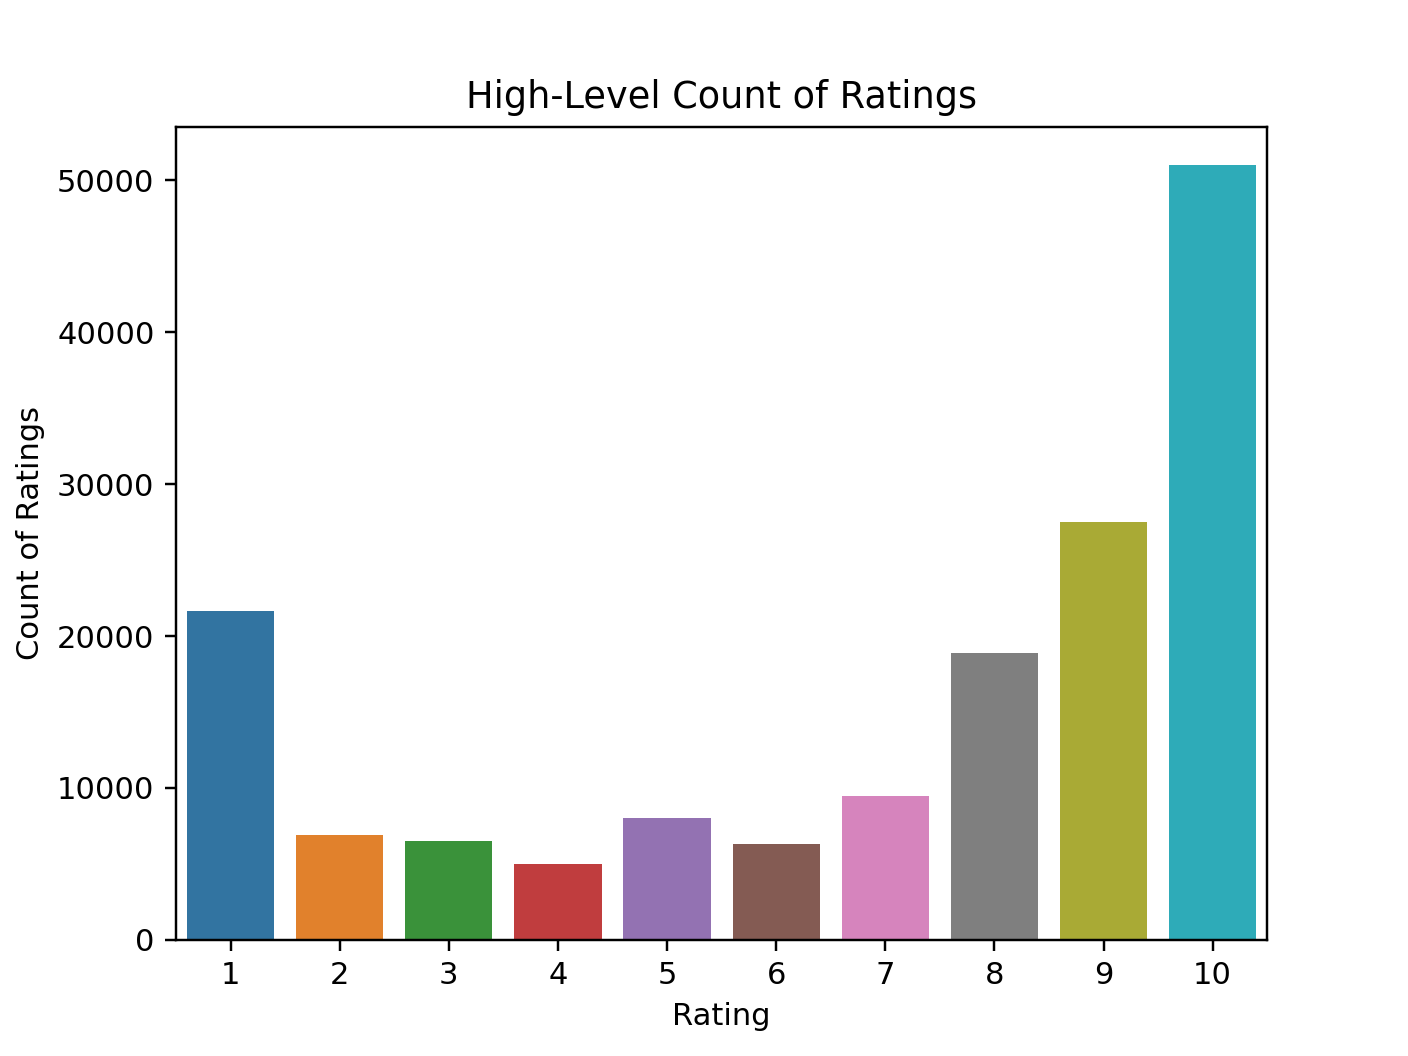

In [11]:
# time to inspect the high-level distribution of ratings, 

r = sns.countplot(data = drug_df, x = 'rating')
r.set(title = "High-Level Count of Ratings")
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.show()

In [12]:
# As you can see from above, there is a polarization amongst the dataset with a high concentration of reviewers
# giving 1, 9 and 10 ratings
# let's look at the top 20 drugs(by count of reviews)
drug_rating_count = drug_df.groupby('drugName').count().sort_values('rating', ascending = False)
drug_rating_count = drug_rating_count[0:21]
drug_rating_count = pd.DataFrame(drug_rating_count.drop(['uniqueID', 'condition', 'review','date','usefulCount'], inplace = True, axis = 1))
drug_rating_count.head(5)

#sns.barplot(data = drug_rating_count, y = "rating", x = "drugName", ax=ax)
#plt.xticks(rotation=90)

""


In [ ]:
# grouping by like "conditions" and then inspecting a few to see the rating distributions based on type of drug  
condition_gb = drug_df.groupby('condition')

# printing the first entries for the different groups
condition_gb.first()

In [ ]:
# as you can see from above, there needs to be some data cleanup; there seems to be some erroneous conditions 
# and also, misspelled/cut-off naming conventions (e.g. zen Shoulde)
# let's go ahead and get rid of some erroneous entries
# for starters, when there are 1 or more numbers at the start of the condition column, I will get rid of that observation
drug_df['digit_check'] = drug_df['condition'].str[0].str.isdigit()
drug_df = drug_df[drug_df.digit_check == 0]
drug_df.drop('digit_check', axis = 1, inplace = True)
drug_df.shape
# looks like that removed 1799 observations from the dataset or roughly 1.11% 

In [ ]:
# checking for null values and summation
null_df = pd.DataFrame({'null values?':drug_df.isnull().any(), 'null summation':drug_df.isnull().sum()})
null_df

In [ ]:
# let's inspect "birth control" in detail 
birth_control = condition_gb.get_group('Birth Control')
birth_control.head(10)

In [ ]:
# so, there's an interesting distribution going on here.. some polarized views; I wonder if one drug or a few drugs is/are
# skewing the distribution one way or the other; i'm going to inspect the averages for each drug
bc1 = birth_control.groupby('drugName', as_index = False)['rating'].mean()
bc2 = birth_control.groupby('drugName', as_index = False)['rating'].count()
bcmerge = bc1.merge(bc2, how='inner', on='drugName').rename(columns={'rating_x':'average rating',
                                                                     'rating_y': 'count of ratings'}).sort_values(by='average rating', ascending = False)
print(bcmerge.shape)
bcmerge.head(5)
# there is some substantial variation in the average rating and the count of ratings

In [ ]:
# importing libraries for creating an interactive plotting experience (visualizing the above graph based on condition)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from io import StringIO
import plotly.express as px
import mplcursors

In [ ]:
# initializing the filters for the interactive plot
# filter by condition
# filter by drugName
condition_options= list(drug_df['condition'].unique())
drug_options= list(drug_df['drugName'].unique())

condition_select = widgets.Dropdown(
    options= condition_options,
    #value='All',
    description='Condition:',
)

drug_select = widgets.Dropdown(
    options= drug_options,
    #value='All',
    description='Drug Name:',
)

In [ ]:
def plotit_condition(conditions_list):
    """
    Function used to customize visualization/plot based on selection/drop-down menu; this is a good way to minimize 
    the landscape dedicated to plotting 
    - globally-defined dataframe is drug_df
    - included, filter-able column: condition

    Args:
    -----
        * condition (str): select one of the condition's you wish to visualize

    Returns:
    -------- 
        * aggregated distribution of ratings based on the condition being treated
        

    """
    df2 = drug_df.copy()
    df2 = df2.groupby(['condition'])
    df_condition = df2.get_group(conditions_list)
    
    # plots showing relationship between average rating and count of ratings for each drug that treats the same condition
    # e.g. plot 2 cells above that shows the average rating (y axis) and count of ratings (x axis) for all 
    # birth control (condition) drugs (drugName)
    # defining the plotting structure/conditions
    if len(df_condition) > 0:
        df_condition_mean = df_condition.groupby(['drugName'], as_index = False)['rating'].mean()
        df_condition_count = df_condition.groupby(['drugName'], as_index = False)['rating'].count()
        df_condition_merge = df_condition_mean.merge(df_condition_count, how = 'inner', on ='drugName').rename(columns={'rating_x':'average_rating',
                                                                     'rating_y': 'count_of_ratings'}).sort_values(by='average_rating', ascending = False)
        # creating the Condition scatterplot and setting parameters
        fig, ax = plt.subplots(figsize=(7, 5))
        sns.set_theme(style="darkgrid")
        plot = sns.scatterplot(x = "count_of_ratings", y = "average_rating", data = df_condition_merge, hue="drugName", ax=ax)
        plt.title('Drug Avg. Rating and Review Count')
        
        # creating the functions required to display annotations (via hovering)
        drug_labels = list(df_condition_merge['drugName'].unique())
        cursor = mplcursors.cursor(hover=True)
        cursor.connect(
            "add", lambda sel: sel.annotation.set_text(drug_labels[sel.target.index]))

        # not showing the legend if > X drugs are displayed (need to refine)
        if len(list(df_condition_count.drugName.unique())) > 1:
            ax.legend().set_visible(False)
        else: 
            pass
        plt.show();
    else:
        print("No data to show for current selection")

In [ ]:
# calling the plotit function within the interactive library
# use the square/rectangle icon to zoom into a sub-region within the graph
# to reset the view back to the original, click the home icon
interact(plotit_condition, conditions_list = condition_select)